In [29]:
import psycopg2
import yaml
from contextlib import closing

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [11]:
with open('../scraping/airlinersnet/config.yaml', 'r') as config_file:
    config = yaml.load(config_file, Loader=yaml.BaseLoader)

In [17]:
conn = psycopg2.connect(**config['db'])

In [63]:
with closing(conn.cursor()) as c:
    c.execute('''
        SELECT gr.name, gr.photos FROM (
            SELECT
                   at.name AS name,
                   coalesce(sum(av.photos), -1) AS photos
            FROM aircraft_types at
            LEFT JOIN aircraft_versions av on at.id = av.type_id
            GROUP BY at.name
        ) gr ORDER BY gr.photos DESC;                                                                             
    ''')
    
    df = pd.DataFrame(c.fetchall(), columns=['name', 'photos'])
    
conn.commit()

In [64]:
df.head(20)

,name,photos
0,Airbus A320,165192
1,Boeing 737-800 (BBJ2/C-40/P-8),132242
2,Boeing 747-400 (AL-1),112760
3,Airbus A319,84949
4,Boeing 767-300,74788
5,Boeing 737-700 (BBJ/C-40 Clipper),56904
6,Airbus A330-200,55058
7,Airbus A330-300,46041
8,McDonnell Douglas MD-80 (DC-9-80),40281
9,Boeing 737-400,31496


In [65]:
rate = 1/400.0

df_sampled = df.copy()
df_sampled.loc[:, 'photos_sampled'] = df_sampled['photos'] * rate

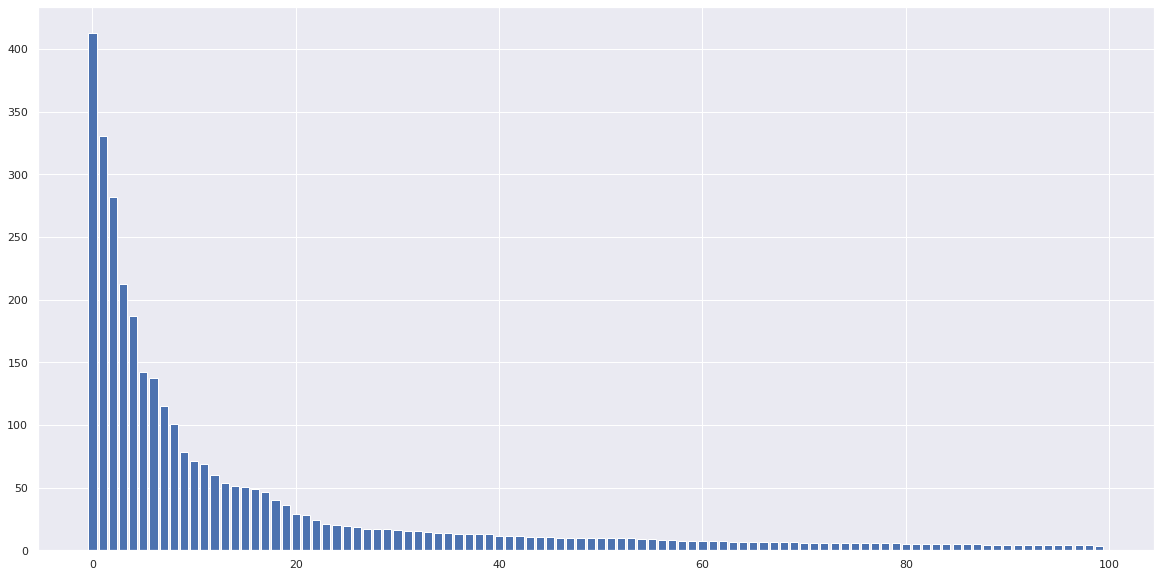

In [66]:
dfc = df_sampled.head(100)

plt.figure(figsize=(20,10))

plt.bar(np.arange(dfc.shape[0]), dfc['photos_sampled'])
plt.show()

In [68]:
pd.set_option('display.max_rows', 500)
display(df_sampled.head(500))
pd.reset_option('display.max_rows')

,name,photos,photos_sampled
0,Airbus A320,165192,412.9800
1,Boeing 737-800 (BBJ2/C-40/P-8),132242,330.6050
2,Boeing 747-400 (AL-1),112760,281.9000
3,Airbus A319,84949,212.3725
4,Boeing 767-300,74788,186.9700
5,Boeing 737-700 (BBJ/C-40 Clipper),56904,142.2600
6,Airbus A330-200,55058,137.6450
7,Airbus A330-300,46041,115.1025
8,McDonnell Douglas MD-80 (DC-9-80),40281,100.7025
9,Boeing 737-400,31496,78.7400
